In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [2]:
df = pd.read_csv('clean_movie.csv', index_col=0)
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [3]:
df.shape

(1651, 13)

Loại phim và Budget và imcome của top 10 loại phim có số lượng nhiều nhất

In [4]:
arr = np.concatenate(np.array(df["Genre"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dic = {}
for value, count in zip(unique_values, value_counts):
    dic[value] = count
dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
top_10_genre = list(dic.keys())[:10]

In [5]:
dic_10_genre_budge_income = pd.DataFrame([],columns=['Budget', 'Income'])
for i in top_10_genre:
    df_temp = df[df["Genre"].apply(lambda x: i in x.split(', '))]
    dic_10_genre_budge_income.loc[i,'Budget'] = int(df_temp['Budget'].sum())
    dic_10_genre_budge_income.loc[i,'Income'] = int(df_temp['Income'].sum())
dic_10_genre_budge_income

,Budget,Income
Drama,30276198912,96431059732
Action,59241320086,189439804601
Comedy,29961221232,102850802208
Adventure,57921220720,204172892900
Thriller,13507068242,46684428044
Crime,11660089916,34783548229
Romance,7279694260,25458749879
Sci-Fi,20974390454,71486476377
Horror,4549208910,17216251090
Fantasy,16680073355,57346188556


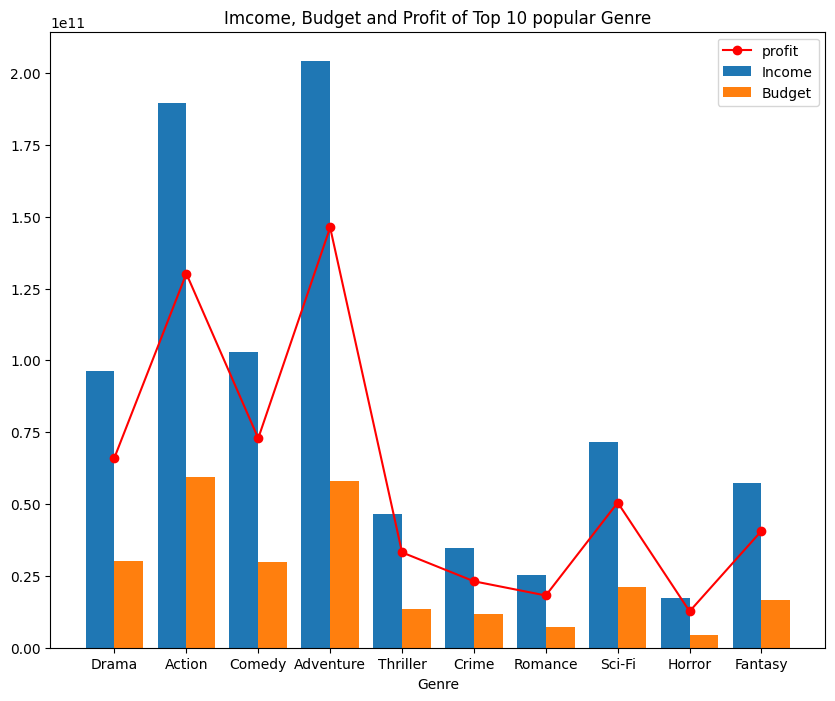

In [6]:
axis = np.arange(len(dic_10_genre_budge_income.index))
plt.figure(figsize=(10,8)) 
plt.bar(axis - 0.2, dic_10_genre_budge_income['Income'], 0.4, label = 'Income')
plt.bar(axis + 0.2, dic_10_genre_budge_income['Budget'], 0.4, label = 'Budget')
plt.plot(axis ,dic_10_genre_budge_income['Income'] - dic_10_genre_budge_income['Budget'], marker='o', color='red', label='profit')
plt.xticks(axis, dic_10_genre_budge_income.index)
plt.xlabel("Genre")
plt.title("Imcome, Budget and Profit of Top 10 popular Genre")
plt.legend()
plt.show()

Số lượng phim mỗi tháng qua từng năm

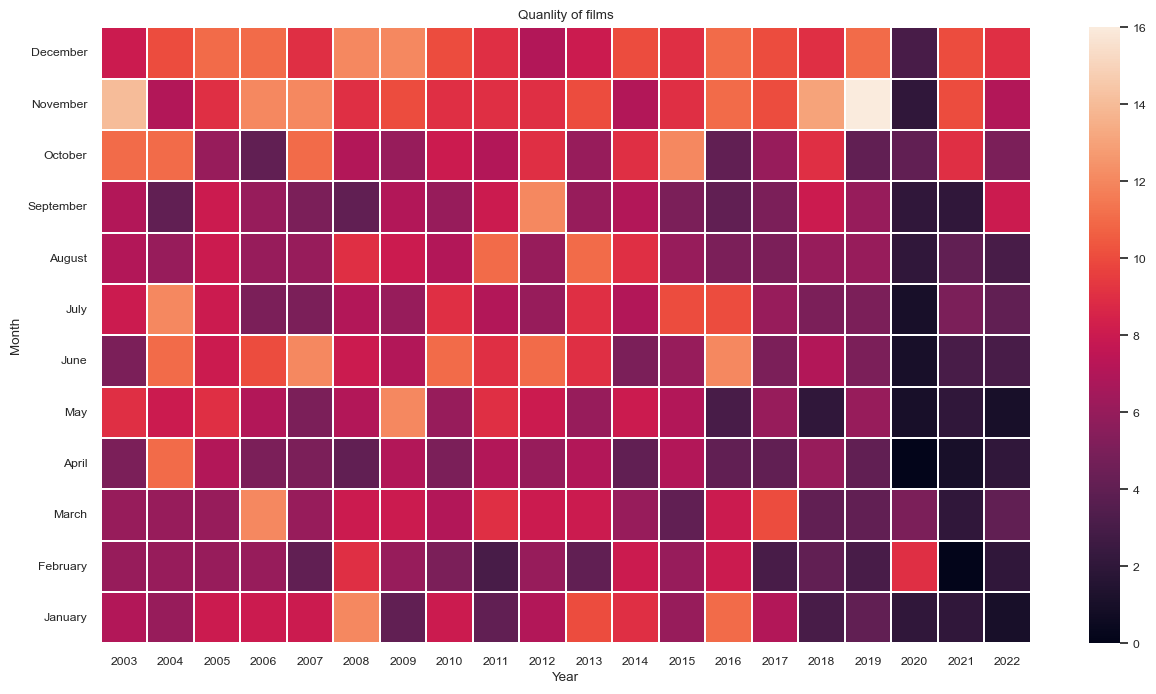

In [7]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.reverse()
new_df = pd.DataFrame([], index = month)
year_min = df['Year'].min()
year_max = df['Year'].max()
for i in range(year_min, year_max+1):
    temp_list = []
    for j in month:
        temp_list.append(df[(df['Year'] == i) & (df['Month'] == j)].shape[0])
    new_df[i] = temp_list
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.8)
sns.heatmap(new_df,linewidth=.25).set(xlabel='Year', ylabel='Month', title="Quanlity of films")
plt.show()

Các diễn viên

In [8]:
arr = np.concatenate(np.array(df["Stars"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dictionary = {}
for i, j in zip(unique_values,value_counts):

    dictionary[i] = j
dictionary = dict(sorted(dictionary.items(), key=lambda x:x[1], reverse=True))

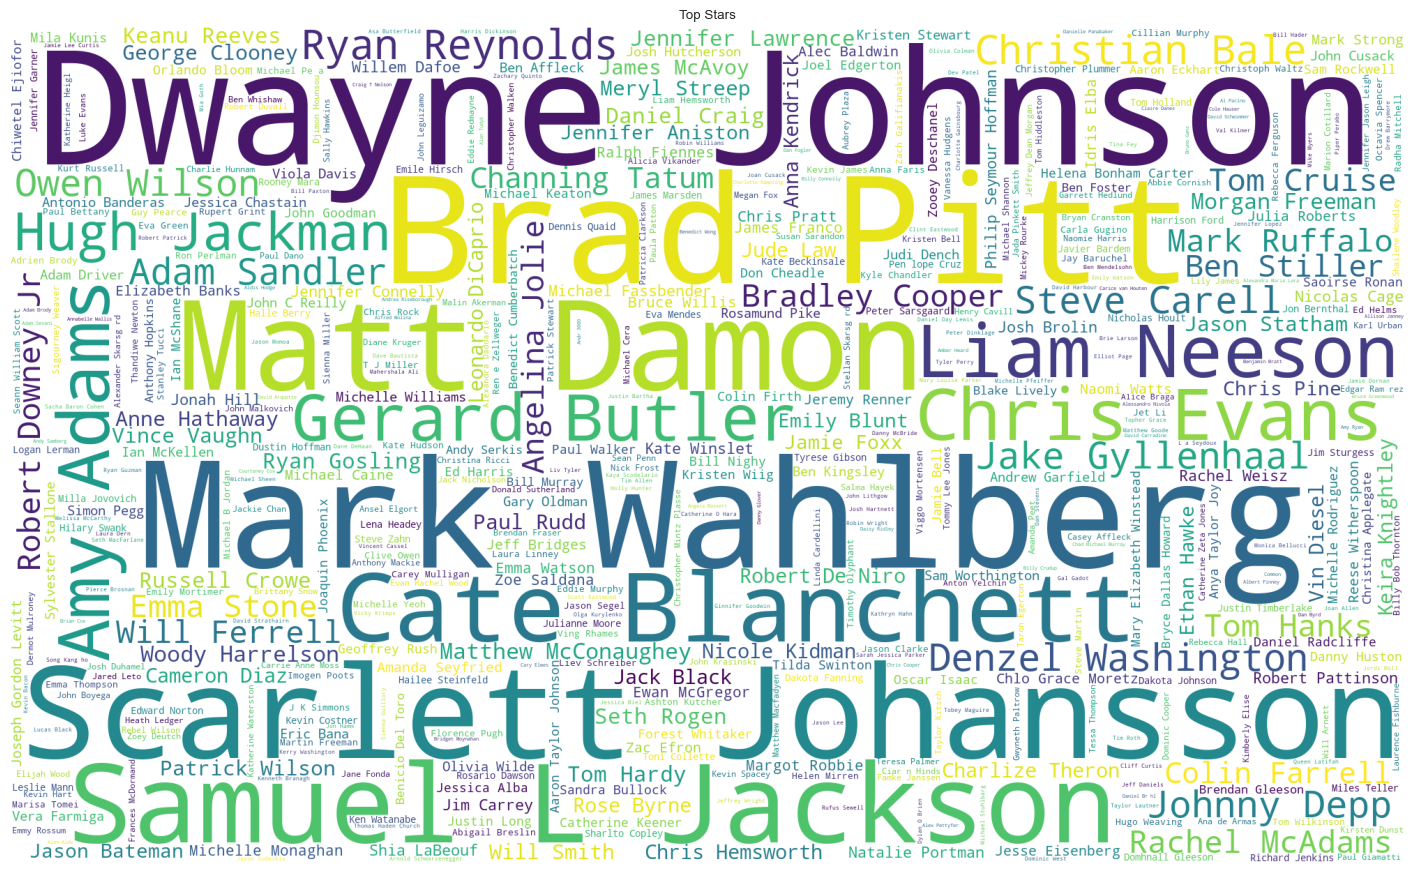

In [9]:
plt.figure(figsize=(18,15))
wc = WordCloud(background_color="white", width=2000, height=1200, max_words=500).generate_from_frequencies(dictionary)
plt.imshow(wc)
plt.title("Top Stars")
plt.axis("off")
plt.show()

In [10]:
arr = np.concatenate(np.array(df["Directors"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dictionary = {}
for i, j in zip(unique_values,value_counts):

    dictionary[i] = j
dictionary = dict(sorted(dictionary.items(), key=lambda x:x[1], reverse=True))

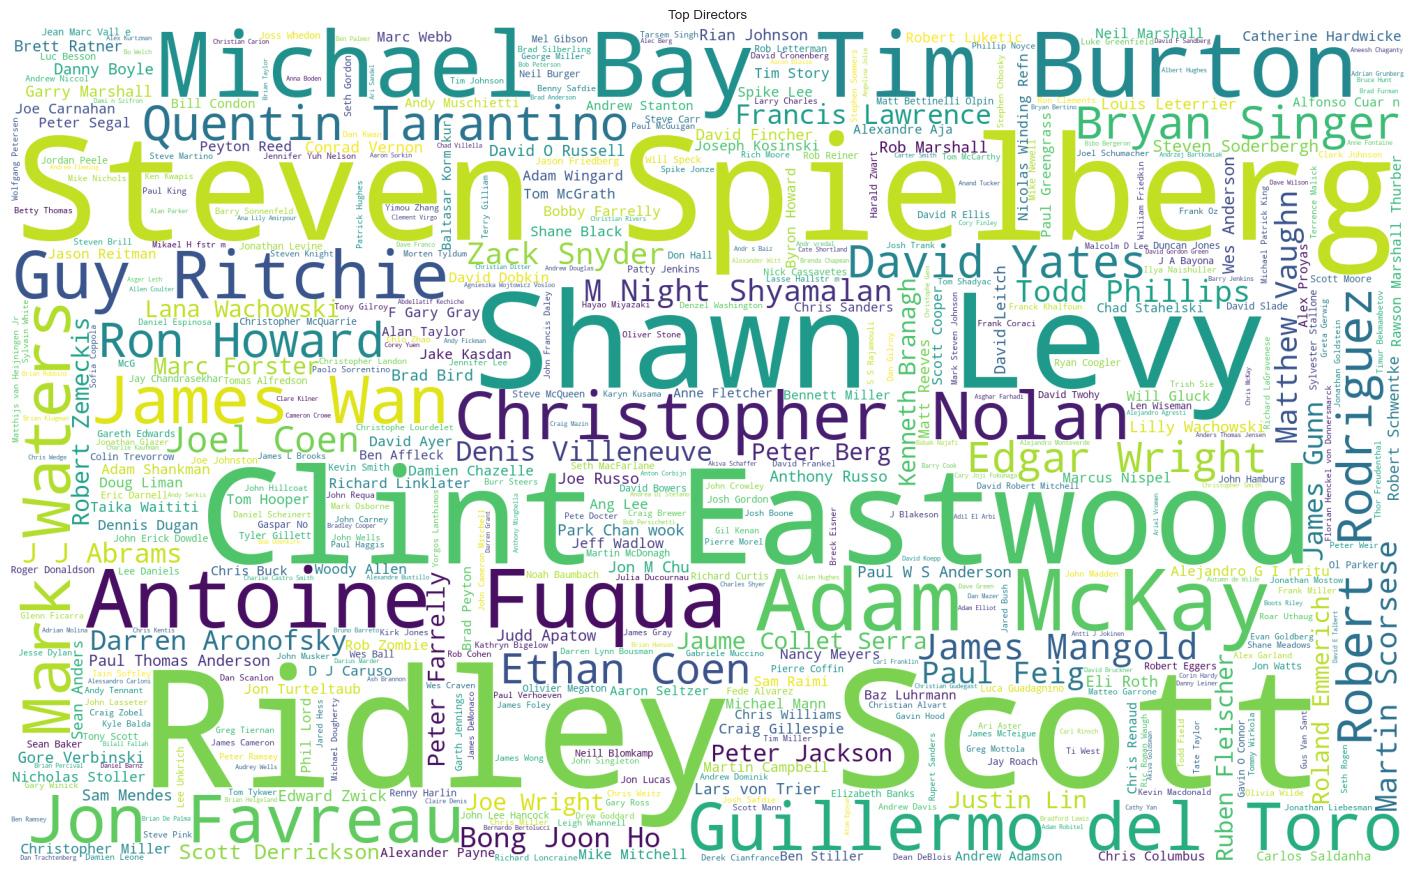

In [12]:
plt.figure(figsize=(18,15))
wc = WordCloud(background_color="white", width=2000, height=1200, max_words=500).generate_from_frequencies(dictionary)
plt.imshow(wc)
plt.title("Top Directors")
plt.axis("off")
plt.show()